# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 4: Non-linear/Kernelized SVM

## Learning Objectives

At the end of the experiment, you will be able to

* distinguish between linear and non-linear separable data
* understand what is Kernel
* know different types of Kernels
* perform SVM on non-linear separable data
* understand the significance of C and gamma hyperparameter for regularization

### Introduction

**Quick overview of SVM:**

* SVM assumes that the data is linearly separable.

* It chooses the line which is more distant from both the classes.

In the SVM algorithm, we find the points closest to the line from both the classes. These points are called **support vectors**. We compute the distance between the line and the support vectors, this distance is called the **margin**. The goal is to maximize the margin. The hyperplane for which the margin is maximum is called an **optimal hyperplane**.
<br><br>
<center>
<img src= "https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/linear_data.png" width= 400 px/>
</center>

### Setup Steps:

### Import required packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

### How SVM works with linear and non-linear separable data

Linear separable data

*  Find the extreme points of the dataset, which are called support vectors.
*  Get the optimal hyperplane that has the highest margin between the line and support vectors

Non-linear and inseparable data

*  Use **Kernels** to transform data into higher dimensions.
*  Separate the points using Linear SVM

### Kernel

The kernel means transforming data into another dimension that has a clear dividing margin between classes of data as shown in the figure below.

<center>
<img src= "https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/kernel.png" width= 500 px/>
</center>

### Kernelized SVM

The objective function for linear SVM is given by

$$L(\alpha) = \sum \limits_{i=1}^{m} \alpha_i - \frac{1}{2} \sum \limits_{i=1}^{m} \sum \limits_{j=1}^{m} \alpha_i\alpha_jt_it_jx_i^T.x_j$$

The objective function for linear SVM after $\phi$ transformation

$$L(\alpha) = \sum \limits_{i=1}^{m} \alpha_i - \frac{1}{2} \sum \limits_{i=1}^{m} \sum \limits_{j=1}^{m} \alpha_i\alpha_jt_it_j\phi (x_i)^T.\phi (x_j)$$

where $\alpha$ is the Lagrange multiplier such that $\alpha_i \geq 0$ for $i = 1, \cdots, m$ and $\sum \limits_{i=1}^{m}\alpha_it_i = 0$.

The objective function after transformation is more expensive to evaluate than the previous one and it leads to the following modified form

$$L(\alpha) = \sum \limits_{i=1}^{m} \alpha_i - \frac{1}{2} \sum \limits_{i=1}^{m} \sum \limits_{j=1}^{m} \alpha_i\alpha_jt_it_jK(x_i,x_j)$$

where $K(x_i,x_j) = \phi (x_i)^T.\phi (x_j)$ is called a kernel function.

Hence, in machine learning, a kernel is a function capable of computing the dot product $ϕ(x_i)^T ϕ(x_j)$ based only on the original vectors $x_i$ and $x_j$, without having to compute (or even to know about) the transformation $ϕ$. This is the essence of the kernel trick.

Some of the most commonly used kernels are:

* Linear: 
$$K(x_i, x_j) = x_i^Tx_j$$
* Polynomial: 
$$K(x_i, x_j) = (\gamma x_i^Tx_j + r)^d$$
* Gaussian Radial Basis Function (RBF): 
$$K(x_i, x_j) = exp(-\gamma ||x_i - x_j||^2)$$
* Sigmoid: 
$$K(x_i, x_j) = tanh(\gamma x_i^Tx_j + r)$$

where $x_i$ and $x_j$ are original vectors, $d$ is degree of polynomial, $r$ is free parameter and $\gamma$ is regularization parameter.

One of the most commonly used kernels for SVM is RBF kernel. Let's see how it works.

### Working of RBF Kernel

One of the techniques to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark. 

For example, let’s take the 1D dataset add two landmarks to it at $x_1  = –2$ and $x_1  = 1$ (see left plot in the figure below). Next, let’s define the similarity function to be the Gaussian Radial Basis Function (RBF) with $\gamma = 0.3$.

$$\phi_{\gamma}(x, l) = exp(-\gamma||x-l||^2)$$

where, $l$ is the landmark (which can be another datapoint).

It is a bell-shaped function varying from $0$ (very far away from the landmark) to $1$ (at the landmark). 

Now we compute the new features, let’s look at the instance $x_1  = –1$: it is located at a distance of $1$ from the first landmark, and $2$ from the second landmark. Therefore its new features are 
* $x_2 = exp (–0.3 × 1^2 ) ≈ 0.74$ and 
* $x_3 = exp (–0.3 × 2^2) ≈ 0.30$. 

The plot on the right of the below figure shows the transformed dataset. As we can see, it is now linearly separable.

<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/RBFKernel_plots.png" />
<figcaption>Feature space before transformation$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $Feature space after transformation</figcation>
</center>
<br>

**How to select the landmarks**

The simplest approach is to create a landmark at the location of every instance in the dataset. This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. The downside is that if the training set is very large, we end up with an equally large number of features and it may be computationally expensive to compute all the additional features. However, the kernel trick does its SVM magic: it makes it possible to obtain a similar result as if we had added many similarity features, without actually having to add them.

**Exercise 1:** Perform transformation on the `circles` dataset of Scikit-Learn to make the classes linearly separable using Radial Basis Function.

Load the data from the Scikit-Learn datasets

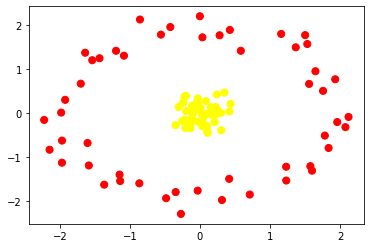

In [5]:
# The number of points generated is 100 
# The Standard deviation of Gaussian noise added to the data is 0.1

X, y = datasets.make_circles(100, factor=0.1, noise=.1)
# Scale the data
X = StandardScaler().fit_transform(X)
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Mapping Function (Radial basis function) 

* By using Radial basis function add one more dimension to the original data to visualize the data linearly in high dimensional space
* Below is the formula to compute RBF function. The gamma is the regularization parameter. Here take gamma = 1

   $K(X, X_i) = exp(-\gamma  \sum(X-X_i)^2)$

In [6]:
# Radial Basis Function where gamma = 1 and taking landmark at (0,0)
gamma = 1
landmark = np.array([0.0, 0.0])
rbf = np.exp(-gamma * np.sum((X - landmark)**2, axis = 1))
print(rbf)

[0.82955946 0.93508029 0.03173303 0.02252839 0.0047163  0.96807796
 0.93773862 0.8951025  0.9108674  0.91582329 0.92828631 0.9123755
 0.0355598  0.98674318 0.93337492 0.01365542 0.89620157 0.83686752
 0.90791481 0.01821622 0.9878178  0.01197813 0.03537817 0.01667673
 0.01335083 0.9513105  0.00491103 0.95322862 0.01803828 0.09701512
 0.00460274 0.99630455 0.04747146 0.01968409 0.01071026 0.96384734
 0.82900424 0.99000495 0.98988432 0.95391166 0.86861681 0.01039924
 0.9931735  0.04890632 0.01856992 0.88355667 0.92424158 0.03621303
 0.83970478 0.00690704 0.94882824 0.79243872 0.71416668 0.02738154
 0.00822235 0.05694238 0.02042007 0.01906408 0.96226395 0.77920146
 0.97161961 0.98829425 0.01910832 0.89478067 0.96058846 0.04371772
 0.01776833 0.79272824 0.89752724 0.01387726 0.00569204 0.02243668
 0.00531331 0.02045113 0.93553241 0.04118751 0.08821111 0.80371548
 0.95659149 0.02464838 0.00802769 0.9602244  0.0372028  0.05231773
 0.02386519 0.03452564 0.81928157 0.03096447 0.9375366  0.95383

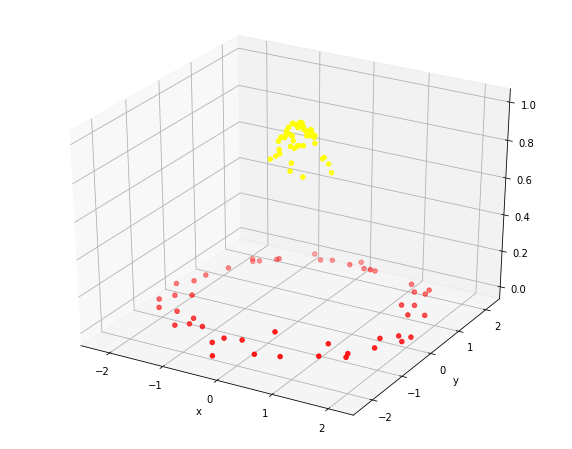

In [7]:
# Visualze data in 3d

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], rbf, c=y, s=20, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

From the above plot, we can observe that the data becomes linearly separable by transforming the data to higher dimensions.

Here we specify the landmark based on intuition but in practice, SVM takes care of it.

Now, we apply SVM Classifier using RBF Kernel.

In Scikit-Learn, we can apply kernelized SVM simply by specifying kernel to RBF (radial basis function) kernel

In [8]:
# Kernel is 'rbf'
clf_RBF = SVC(kernel='rbf').fit(X, y)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


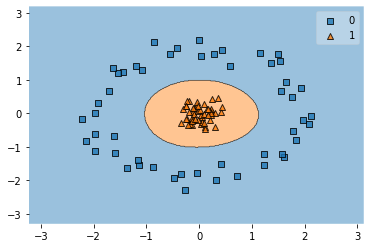

In [9]:
# Visualization using RBF Kernel
plot_decision_regions(X, y, clf_RBF, legend=1)

Using the RBF kernelized support vector machine, we see a suitable nonlinear decision boundary.

Another approach to handle nonlinear datasets is to add more features, such as polynomial features; in some cases this can result in a linearly separable dataset. Let's see how Polynomial Kernel works.

### Working of Polynomial Kernel

Consider the left plot in the figure below: it represents a simple dataset with just one feature, $X_1$. As we can see, this dataset is not linearly separable. But if we add a second feature $X_2 = (X_1)^2$, the resulting 2D dataset is perfectly linearly separable as shown in the plot on right.

<center>
<img src="https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/non_linear_data.png" width= 600 px/>
</center>

Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs). Also, at a low polynomial degree, this method cannot deal with very complex datasets, and with a high polynomial degree, it creates a huge number of features, making the model too slow. Fortunately, when using SVMs we can apply an almost miraculous mathematical technique called the kernel trick. The kernel trick makes it possible to get the same result as if we had added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features because we don’t actually add any features. This trick is implemented by the `SVC` class.

**Exercise 2:** Perform transformation on the `circles` dataset of Scikit-Learn to make the classes linearly separable by
* manually selecting higher dimension features
* applying Polynomial Kernel of SVC class

Load the data from the Scikit-Learn datasets

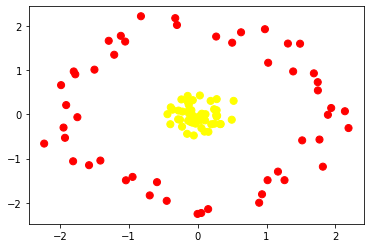

In [11]:
# The number of points generated is 100 
# The Standard deviation of Gaussian noise added to the data is 0.1

X, y = datasets.make_circles(100, factor=0.1, noise=.1)
# Scale the data
X = StandardScaler().fit_transform(X)

# Vicualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [12]:
# For each instance X=[a,b], let's consider three features X = [a^2, b^2, a*b]
feature_1 = X[:, 0]**2
feature_2 = X[:, 1]**2
feature_3 = X[:, 0] * X[:, 1]

Visulaization of data in 3D

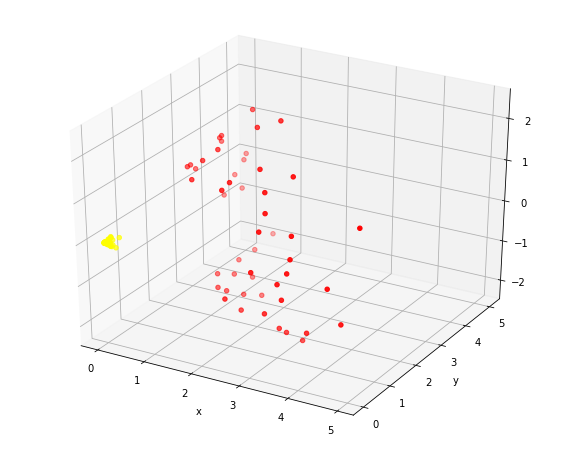

In [13]:
# Visualzing in 3d

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(feature_1, feature_2, feature_3, c=y, s=20, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

From the above plot, we can observe that the data becomes linearly separable by transforming the data to higher dimensions.

Now, we apply SVM Classifier using Polynomial Kernel and visualize the decision boundary.

In Scikit-Learn, we can apply kernelized SVM simply by specifying kernel to `poly` kernel.

In [14]:
# Kernel is 'poly'
clf_poly = SVC(kernel='poly', degree=2).fit(X, y)

Visualization using Polynomial Kernel

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


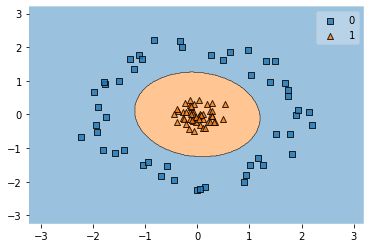

In [15]:

plot_decision_regions(X,y,clf_poly,legend=1)

Using the polynomial kernelized support vector machine also, we see a suitable non-linear decision boundary.

**Let's see how we can make classification using linear, polynomial, and rbf kernel of SVM on different datasets.**

**Exercise 3**: Perform classification on `moons` dataset of Scikit-Learn using different kernels and compare their prediction accuracy.

Load the data from the Scikit-Learn datasets

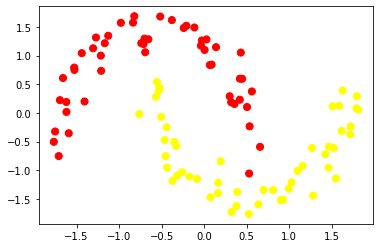

In [16]:
# The number of points generated is 100 
# The Standard deviation of Gaussian noise added to the data is 0.1

X, y = datasets.make_moons(100, noise=.1)
# Scale the data
X = StandardScaler().fit_transform(X)
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Splitting the data into training and testing set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 123)
print(X_train.shape, y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70, 2) (70,)
(30, 2)
(30,)


Apply the SVM classifier and try to fit the model using **Linear Kernel** on the data

In [19]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let us visualize the decision boundaries of the data

In [20]:
# Function for plotting Decision boundaries

def plot_svc_decision_boundaries(model, ax=None):
    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()                  # get the current Axes instance on the current figure matching the given keyword arguments, or create one
    xlim = ax.get_xlim()                # return the x-axis view limits
    ylim = ax.get_ylim()                # return the y-axis view limits
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0],ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.reshape(-1), Y.reshape(-1)]).T
    # Evaluates the decision function for the samples in X.
    P = model.decision_function(xy).reshape(X.shape)  
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Call the above function by passing the trained model to observe the decision boundaries

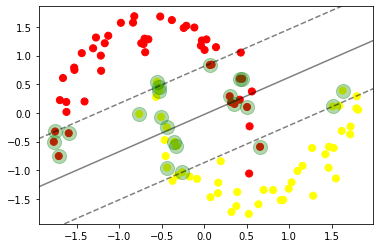

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_boundaries(clf);
# Visualize the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, lw=1, facecolors='green', alpha=0.3);

predict the test data

In [22]:
y_pred = clf.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred)
print(acc_linear)

0.8666666666666667


Now, we apply SVM Classifier using **Polynomial Kernel**

In Scikit-Learn, we apply kernelized SVM simply by changing `linear` kernel to `poly` kernel.

In [23]:
# Kernel is 'poly'
clf = SVC(kernel='poly', degree= 3, coef0= 1)
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Visualization using Polynomial Kernel

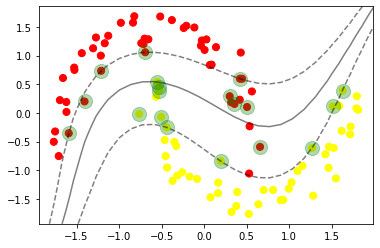

In [24]:
# Call the decision boundary function 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_boundaries(clf)
# Visualize the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, lw=1, facecolors='green', alpha=0.3);

predict the test data

In [25]:
# Make prediction on test data
y_pred = clf.predict(X_test)
acc_polynomial = accuracy_score(y_test, y_pred)
print(acc_polynomial)

0.9333333333333333


Now, we apply SVM Classifier using **RBF Kernel**

In Scikit-Learn, apply kernelized SVM by changing `linear` kernel to `rbf` kernel

In [26]:
# Kernel is 'rbf'
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Visualization using RBF Kernel

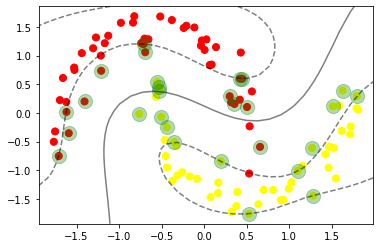

In [27]:
# Call the decision boundary function 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_boundaries(clf)

# Visualize the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, lw=1, facecolors='green', alpha=0.3);

predict the test data

In [28]:
# Make prediction on test data
y_pred = clf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred)
print(acc_rbf)

0.9333333333333333


From the above results, we can see that a non-linear decision boundary can be seen in case of polynomial and rbf kernel. Their testing accuracies are also higher than the linear kernel.

Till now we have seen datasets with two classes and two clusters. Let's see how the different kernels perform on the dataset having two classes and four clusters (two clusters per class).

**Exercise 4**: Perform classification on the non-linear separable dataset having 2 classes and 2 clusters per class using different kernels and compare their prediction accuracy.

Prepare dataset

In [29]:
# generate 25 random numbers for 4 quadrants represents XOR
x1 = np.random.uniform(1,3,25)                 
x2 = np.random.uniform(4,6,25)                 
y1 = np.random.uniform(1,3,25)                 
y2 = np.random.uniform(4,6,25)                 

# features
X_1 = np.vstack([np.append(x1,x2), np.append(y1,y2)]).T  
X_2 = np.vstack([np.append(x1,x2), np.append(y2,y1)]).T  
X = np.vstack([X_1, X_2])   

# label 0 and 1
y_1 = [0 for i in range(len(X_1))]                              
y_2 = [1 for i in range(len(X_2))]                                 
y = np.append(y_1, y_2)  

# stack features and labels
data = np.hstack([X,y.reshape(-1,1)])          

Shuffle the sequential data and separate into features and labels

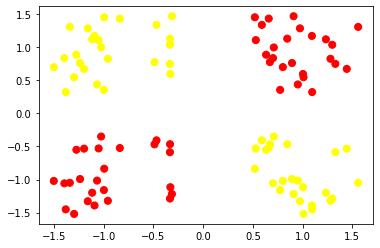

In [30]:
# shuffle the dataset
np.random.shuffle(data)   
# Split the data                     
X, y = data[:,:2], data[:,2]                   
X = StandardScaler().fit_transform(X)
# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

This example of a nonlinear problem resembles the XOR dataset. We can see that it is impossible to try a single line that can separate the red class from the yellow class.

Splitting the data into training and testing set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 123)
print(X_train.shape, y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70, 2) (70,)
(30, 2)
(30,)


Apply the SVM classifier and try to fit the model using **Linear Kernel** on the data

In [32]:

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

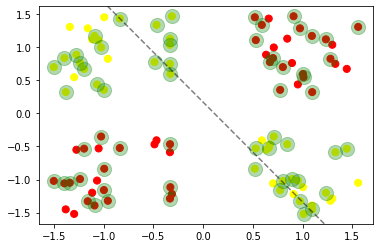

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_boundaries(clf);
# Visualize the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, lw=1, facecolors='green', alpha=0.3);

predict the test data

In [34]:
# Make prediction on test data
y_pred = clf.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred)
print(acc_linear)

0.36666666666666664


Now, we apply SVM Classifier using **Polynomial Kernel**

In Scikit-Learn, we apply kernelized SVM simply by changing `linear` kernel to `poly` kernel.

In [35]:
# Kernel is 'poly'
clf = SVC(kernel='poly', degree= 3, coef0= 1)
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Visualization using Polynomial Kernel

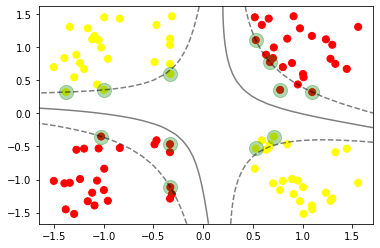

In [36]:
# Call the decision boundary function 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_boundaries(clf)
# Visualize the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, lw=1, facecolors='green', alpha=0.3);

predict the test data

In [37]:
# Make prediction on test data
y_pred = clf.predict(X_test)
acc_polynomial = accuracy_score(y_test, y_pred)
print(acc_polynomial)

1.0


Now, we apply SVM Classifier using **RBF Kernel**

In Scikit-Learn, apply kernelized SVM simply by changing linear kernel to an RBF (radial basis function) kernel

In [38]:
# Kernel is 'rbf'
clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Visualization using RBF Kernel

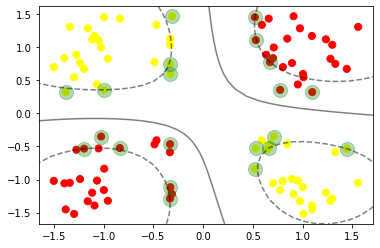

In [39]:
# Call the decision boundary function 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_boundaries(clf)
# Visualize the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, lw=1, facecolors='green', alpha=0.3);

predict the test data

In [40]:
# Make prediction on test data
y_pred = clf.predict(X_test)
acc_rbf = accuracy_score(y_test,y_pred)
print(acc_rbf)

1.0


Using these kernelized support vector machines, we learn a suitable nonlinear decision boundary. These kernel transformation strategies are used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

So far we have centered around very clean datasets, in which a perfect decision boundary exists. But what if the **data has some amount of overlap?** 

For example, we may have data like below:

In [41]:
X1, y1 = datasets.make_blobs(n_samples = 100, centers = 2,
                            random_state = 0, cluster_std = 1.2)
X1 = StandardScaler().fit_transform(X1)

To get a sense of the data, let us visualize the data

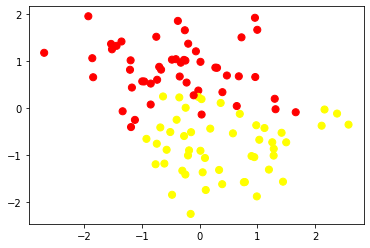

In [42]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn');

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as C.

### Tuning the SVM parameter (C)

For a very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer and can grow to encompass some points.

Let us visualize the picture of how a changing C parameter affects the final fit, via the softening of the margin:

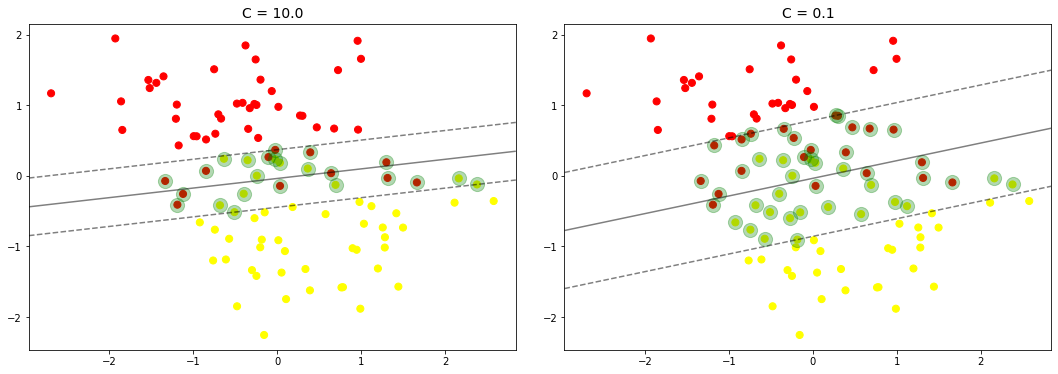

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X1, y1)
    axi.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn')
    plot_svc_decision_boundaries(model, axi)
    axi.scatter(model.support_vectors_[:, 0],                 # visualize the support vectors
                model.support_vectors_[:, 1],
                s=200, lw=1, facecolors='green', alpha=0.3);
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Note that the kernel used in the above problem was linear. In case of nonlinear SVM, other than C parameter we also have $\gamma$(gamma) parameter whose relationship with regularization is similar to C parameter, that is, the more the value of $\gamma$ lesser the regularization.

### Tuning the SVM parameter (gamma, $\gamma$)

Let us visualize the picture of how changing $\gamma$ and C parameters affect the final fit. We will use `moons` dataset for this purpose.

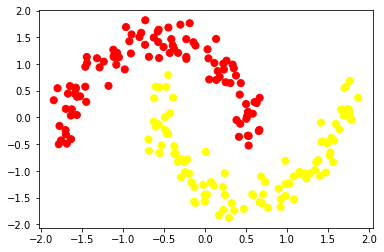

In [44]:
# Load the dataset
X1, y1 = datasets.make_moons(200, noise=.1)
X1 = StandardScaler().fit_transform(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn');


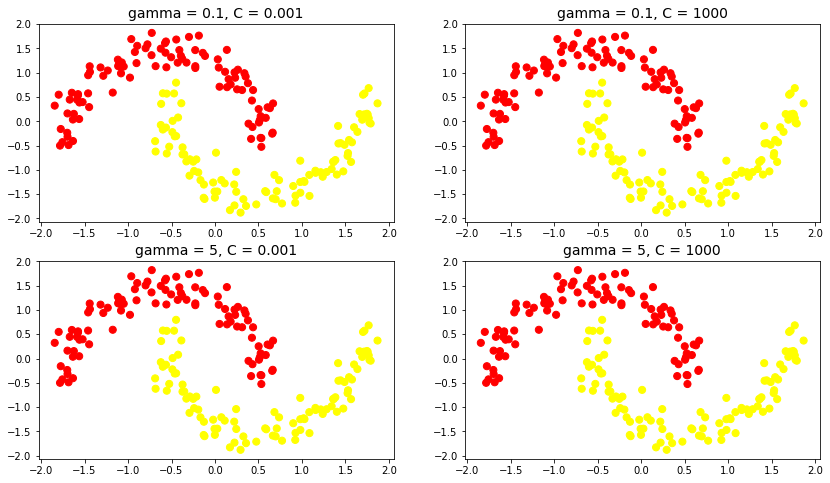

In [45]:
# Visualize the model with different C and gamma hyperparameters
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(14, 8))

gamma_values = [0.1, 0.1, 5, 5]
C_values = [0.001, 1000, 0.001, 1000]
for axi, g, C in zip([ax1, ax2, ax3, ax4], gamma_values, C_values):
    model = SVC(kernel='rbf', gamma = g, C=C).fit(X1, y1)
    axi.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn')
    axi.set_title('gamma = {}, C = {}'.format(g, C), size=14)

The above plots show models trained with different values of hyperparameters gamma ($γ$) and C. Increasing gamma makes the bell-shaped curve narrower (see the lefthand plots). As a result, each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. 

Conversely, a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother. So $γ$ acts like a regularization hyperparameter: if the model is overfitting, we should reduce it; if it is underfitting,
we should increase it (similar to the C hyperparameter).

### Theory Questions

1. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?

    This question applies only to linear SVMs since kernelized SVMs can only use
    the dual form. The computational complexity of the primal form of the SVM
    problem is proportional to the number of training instances $m$, while the computational complexity of the dual form is
    proportional to a number between $m^2$ and $m^3$. So if there are millions of instances, you should definitely use the 
    primal form, because the dual form will be much too slow.


2. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease $γ$ (gamma)? What about C?

    If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularization. To 
    decrease it, you need to increase gamma or C (or both).